In [1]:
# !python --version

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [12]:
checkpoint = 'musicnet_maestro_multiple_decoders'
checkpoint = 'cold_start_only_wav' 

In [13]:
log_file = open('../checkpoints/'+checkpoint+'/main_0.log', 'r')

In [14]:
# print(log_file)

In [15]:
# for line in log_file:
#     print(line)

In [16]:
# for line in log_file:
#     if "Train loss" in line:
#         print(line)

In [25]:
train_losses = []
test_losses = []
epochs = []
def extract_train_loss():
    with open('../checkpoints/'+checkpoint+'/main_0.log', 'r') as f:
        for line in f:
            if "Train loss" in line:
                epoch = line.strip().split('-')[3].strip().split(' ')[1]
                print(line.strip().split('-')[4].strip())
                losses = re.findall('\([0-9\., ]*\)', line)
                train_loss = losses[0]
                test_loss = losses[1]
                
                train_loss = train_loss.strip().lstrip('(').rstrip(')')
                train_loss = train_loss.split(', ')
                train_loss = [float(l) for l in train_loss[:-1]]
                train_loss = np.mean(train_loss)
                
                test_loss = test_loss.strip().lstrip('(').rstrip(')')
                test_loss = test_loss.split(', ')
#                 print(test_loss)
                test_loss = [float(l) for l in test_loss[:-1]]
#                 print(test_loss)
                test_loss = np.mean(test_loss)
                
                epochs.append(int(epoch))
                train_losses.append(train_loss)
                test_losses.append(test_loss)
#                 print("Epoch: ", epoch, " train loss: ", train_loss, "test_loss: ", test_loss)

In [26]:
extract_train_loss()

Train loss: (4.5797, 4.4554, 4.8039, 4.8666, 4.2666, 4.2998, 0.0000), Test loss (3.9608, 3.4989, 3.9294, 4.3001, 3.9678, 4.0114, 0.1922)
Train loss: (4.1220, 4.1079, 4.2998, 4.4179, 3.9372, 3.9612, 1.7663), Test loss (3.2048, 3.1799, 3.5499, 3.7874, 3.1733, 3.4220, 0.2430)
Train loss: (3.1931, 3.1281, 3.5137, 3.8200, 3.0847, 3.1194, 1.6899), Test loss (2.7732, 2.6699, 3.1207, 3.7263, 2.6867, 2.8285, 0.2683)
Train loss: (2.8895, 2.8024, 3.2761, 3.5305, 2.7367, 2.7814, 1.6727), Test loss (2.5757, 2.7164, 3.0102, 3.3935, 2.6355, 2.7275, 0.2843)
Train loss: (2.7343, 2.6555, 3.1988, 3.4113, 2.5974, 2.6604, 1.6521), Test loss (2.4658, 2.4075, 3.0010, 3.2359, 2.5327, 2.6629, 0.3093)
Train loss: (2.6018, 2.4909, 3.0192, 3.3437, 2.4661, 2.5213, 1.6353), Test loss (2.4960, 2.2963, 3.0167, 3.2187, 2.2038, 2.3253, 0.2887)
Train loss: (2.5836, 2.4981, 3.0093, 3.3016, 2.4455, 2.5035, 1.6620), Test loss (2.4135, 2.1668, 2.7766, 3.1295, 2.2296, 2.4132, 0.3013)
Train loss: (2.4840, 2.3494, 2.8970, 3.21

In [27]:
# epoch

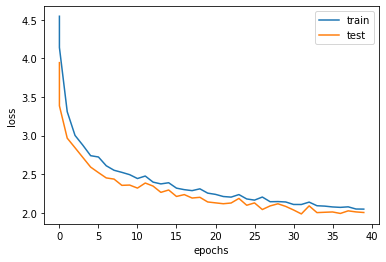

In [28]:
plt.plot(epochs, train_losses, label='train')
plt.plot(epochs, test_losses, label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()